# Dataset Exploration

Dataset: Weinberger, S. (2013). Speech accent archive. George Mason University. http://accent.gmu.edu/<p>
Retrieved from: https://www.kaggle.com/rtatman/speech-accent-archive/data

## Recording Information

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [25]:
df_raw=pd.read_csv('speakers_all.csv')

In [26]:
df_raw

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria,False,NaN,NaN,NaN
2168,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,False,NaN,NaN,NaN
2169,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria,False,NaN,NaN,NaN
2170,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa,False,NaN,NaN,NaN


### Preprocessing

Remove columns with file_missing=True. Remove abundant columns.

In [47]:
df=df_raw[~df_raw['file_missing?']]
df=df.loc[:,:'country']

In [48]:
df

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country
32,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa
33,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa
34,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa
35,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa
36,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa
...,...,...,...,...,...,...,...,...
2167,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria
2168,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria
2169,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria
2170,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa


Value check

In [49]:
df.isna().sum()

age                0
age_onset          0
birthplace         4
filename           0
native_language    0
sex                0
speakerid          0
country            5
dtype: int64

In [50]:
df.dtypes

age                float64
age_onset          float64
birthplace          object
filename            object
native_language     object
sex                 object
speakerid            int64
country             object
dtype: object

### (Simple) Statistics & Visualization

#### Age

In [61]:
df.loc[:,'age'].describe()

count    2140.000000
mean       33.080607
std        14.444245
min         0.000000
25%        22.000000
50%        28.000000
75%        41.000000
max        97.000000
Name: age, dtype: float64

Text(0.5, 1.0, "Speakers' Age")

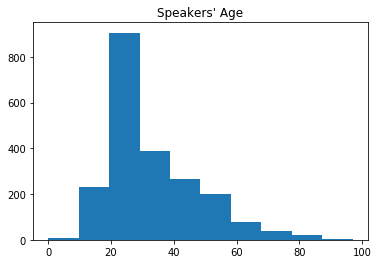

In [76]:
plt.hist(df.iloc[:,0])
plt.title('Speakers\' Age')

#### Native Language

In [125]:
num_of_unique_native_language=df.iloc[:,4].unique().size
print('There are ',num_of_unique_native_language,' different native languages in dataset.')

There are  202  different native languages in dataset.


In [126]:
wordcloudnl = WordCloud(background_color="white")
wordcloudnl.generate_from_frequencies(df.iloc[:,4].value_counts())

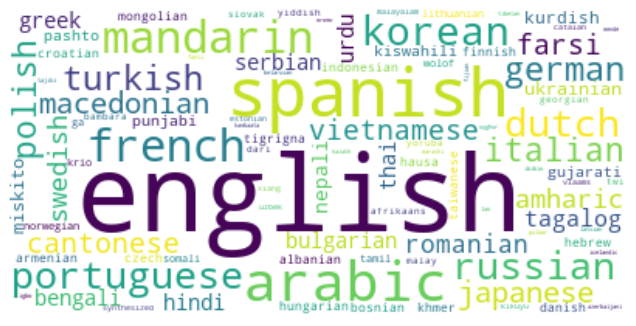

In [127]:
plt.figure(num=None, figsize=(10, 8), dpi=80)
plt.imshow(wordcloudnl, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Country

In [128]:
num_of_unique_native_language=df.iloc[:,-1].unique().size
print('There are ',num_of_unique_native_language,' different countries.')

There are  177  different countries.


In [129]:
wordcloudc = WordCloud(background_color="white")
wordcloudc.generate_from_frequencies(df.iloc[:,-1].value_counts())

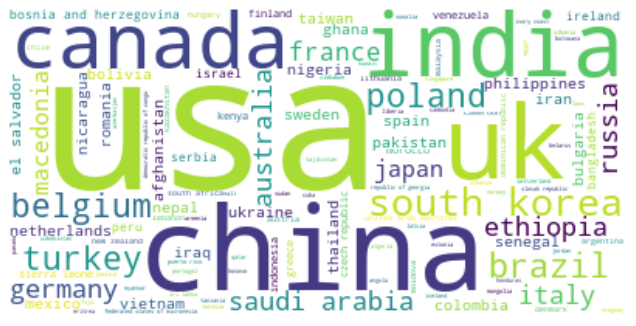

In [130]:
plt.figure(num=None, figsize=(10, 8), dpi=80)
plt.imshow(wordcloudc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Recording Paragraph

For this dataset, each participant was asked to read the following paragraph: (See reading-passage.txt)
>*Please call Stella.  Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station.*

Steven Weinberger claimed that this paragraph "difficult clusters of consonants like P-Ls and S-Ts, just about every vowel in English, and just about every consonant". Not all words/pronounciations that are relatively important for distinguishing certain speaker groups are not included in this paragraph.